
## **In this practice session, we will learn how to implement Recurrent Neural Networks for Time Series Forecasting**
##**We will use the stock prices of tesla dataset for the implementation**

**Data processing**

*   Import the required libraries from Keras
*   Download the dataset from this link : https://finance.yahoo.com/quote/TSLA/history?period1=1436486400&period2=1594339200&interval=1d&filter=history&frequency=1d 
*   Upload the data to the notebook
*   Split the data into train and test set
*   Scale the training data between 0 and 1
*   Create a data structure with 60 time-steps and 1 output


**Build an RNN model**
* Construct a simple LSTM model
* Compile the model and fit the data into the model
* Preprocess the test data and make predictions on test data
* Plot the model predictions vs the actual data

## **Import the libraries needed**

In [1]:
#load the important libraries 
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping


## **Upload the dataset downloaded**

In [2]:
#upload the dataset
from google.colab import files
uploaded = files.upload()

Saving TSLA.csv to TSLA (2).csv


## **Display the dataset**

In [3]:
#read and display the dataset
stock_price = pd.read_csv("TSLA.csv")
stock_price.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
1,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
2,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
3,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000
4,2015-07-16,52.844002,53.439999,52.632000,53.335999,53.335999,8080000


## **Split the dataset into train and test**

In [28]:
#split the dataset into training and test set
training_set = stock_price.iloc[:800, 1:3].values
test_set = stock_price.iloc[800:, 1:3].values

## **Scale the training data**

In [8]:
#scaling the data between 0 and 1
scaling = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = scaling.fit_transform(training_set)

## **Creating a data structure with 60 time-steps and 1 output**

In [9]:
# Creating a data structure with 60 time-steps and 1 output
trainX = []
trainY = []
for i in range(60, 800):
    trainX.append(training_set_scaled[i-60:i, 0])
    trainY.append(training_set_scaled[i, 0])
trainX, trainY = np.array(trainX), np.array(trainY)
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))

## **Build an LSTM model with dropout**

In [10]:
#build the LSTM model
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (trainX.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

## **Compile the model and begin training**

In [11]:
#compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(trainX, trainY, epochs = 10, batch_size = 32)

Epoch 1/10
24/24 [==============================] - 2s 101ms/step - loss: 0.0599
Epoch 2/10
24/24 [==============================] - 3s 114ms/step - loss: 0.0178
Epoch 3/10
24/24 [==============================] - 3s 110ms/step - loss: 0.0140
Epoch 4/10
24/24 [==============================] - 3s 109ms/step - loss: 0.0124
Epoch 5/10
24/24 [==============================] - 3s 109ms/step - loss: 0.0119
Epoch 6/10
24/24 [==============================] - 3s 110ms/step - loss: 0.0119
Epoch 7/10
24/24 [==============================] - 3s 109ms/step - loss: 0.0116
Epoch 8/10
24/24 [==============================] - 3s 111ms/step - loss: 0.0121
Epoch 9/10
24/24 [==============================] - 3s 113ms/step - loss: 0.0110
Epoch 10/10
24/24 [==============================] - 3s 113ms/step - loss: 0.0106


## **Scale and pre-process test data**

In [22]:
# Getting the predicted stock price of 2018
dataset_train = stock_price.iloc[:800, 1:3]
dataset_test = stock_price.iloc[800:, 1:3]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaling.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(459, 60, 1)


## **Make model predictions on test data**

In [25]:
#make the predictions
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaling.inverse_transform(predicted_stock_price)

## **Plot the model predictions**

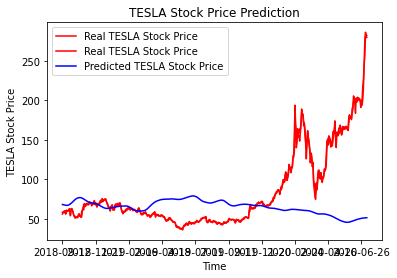

In [27]:
#plot the predictions
plt.plot(stock_price.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(stock_price.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()